In [21]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [22]:
x, y = make_circles(n_samples = 100, noise = 0.1, random_state = 1)

<Axes: >

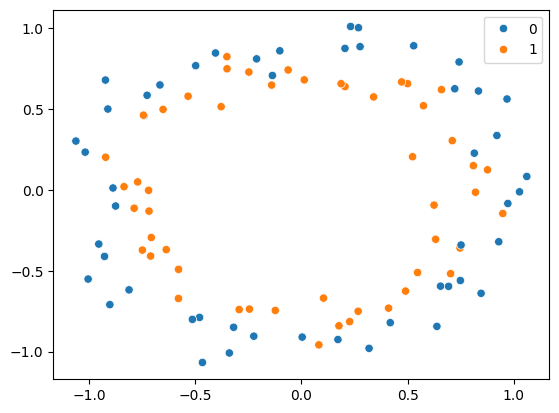

In [23]:
sns.scatterplot(x = x[:, 0], y = x[:, 1], hue = y)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [25]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 500, verbose = 1)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.4547 - loss: 0.6951 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5453 - loss: 0.6903 - val_accuracy: 0.4500 - val_loss: 0.6934
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5102 - loss: 0.6894 - val_accuracy: 0.4500 - val_loss: 0.6961
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5664 - loss: 0.6867 - val_accuracy: 0.4000 - val_loss: 0.6986
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5227 - loss: 0.6883 - val_accuracy: 0.4500 - val_loss: 0.7019
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6086 - loss: 0.6860 - val_accuracy: 0.4500 - val_loss: 0.7041
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5766 - loss: 0.6853 - val_accuracy: 0.4000 - val_loss: 0.7066
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6039 - loss: 0.6822 - val_accuracy: 0.3500 - val_loss

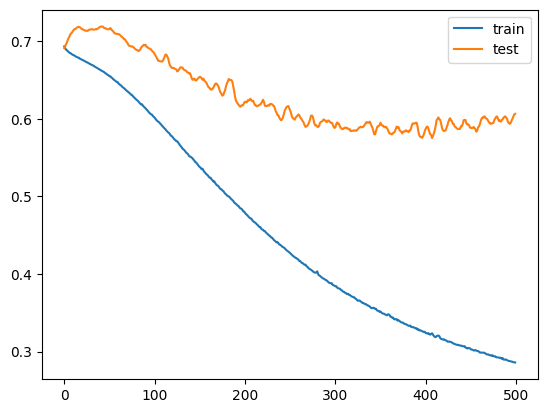

In [28]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()